In [5]:
# libraries needed to fetch image from robot and read and display
import requests
from io import BytesIO
from PIL import Image, ImageTk

# importing libraries needed for text recognition
import cv2
import easyocr
import matplotlib.pyplot as plt

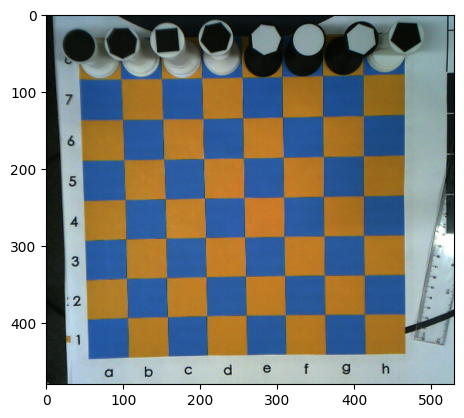

In [245]:
response = requests.get("http://192.168.1.2:4242/current.jpg?type=color")
# response = requests.get("http://10.20.59.13:4242/current.jpg?type=edges")

im = Image.open(BytesIO(response.content))

# Setting the points for cropped image
left = 40
top = 0
right = 570
bottom = 480
im = im.crop((left, top, right, bottom))
im.save("images/8.jpg", format="JPEG")

plt.imshow(im)
plt.show()

In [259]:
def cropFiles(image): # letters, the veritcal column
  left = 15
  top = 0
  right = 80
  bottom = 65

  # nest for loop for ranks(rows) and then files(cols)

  moveVal = 60
  for i in range(0,8): # for the 8 files
    square = image.crop((left, top, right, bottom))

    left += moveVal
    right += moveVal
    
    plt.imshow(square)
    plt.show()

# aRank = Image.open(fp="images/1.1.jpg")
# cropFiles(aRank)

In [233]:
def divideBoardToSquares(image): # the rows, numbers
  left = 0
  top = 410
  right = 550
  bottom = 490

  moveVal = 58
  for _ in range(0,8):

    row = image.crop((left, top, right, bottom))

    top -= moveVal
    bottom -= moveVal
    
    plt.imshow(row)
    plt.show()

    cropFiles(row)

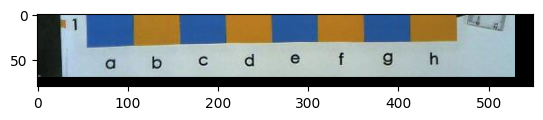

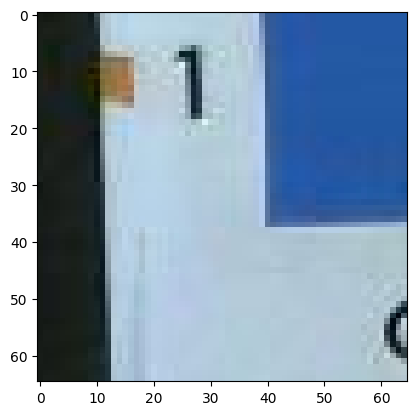

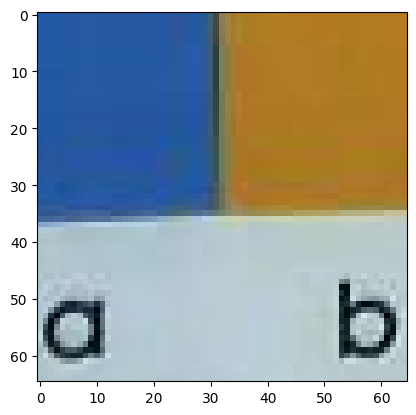

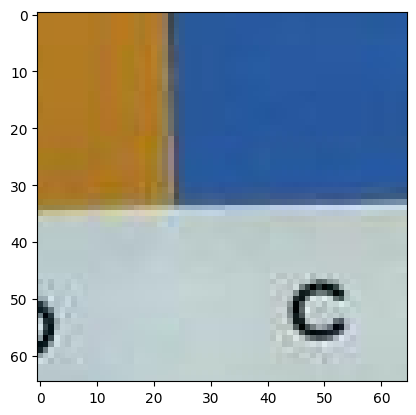

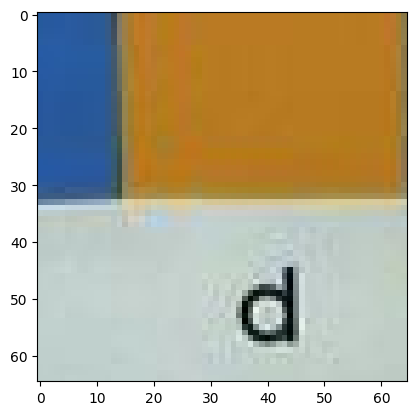

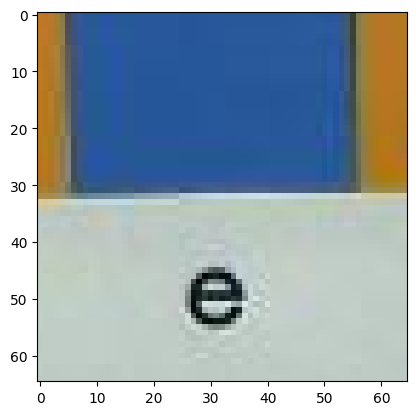

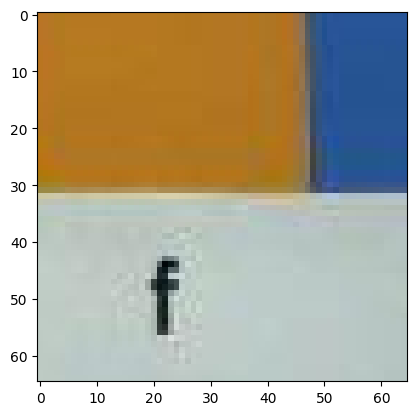

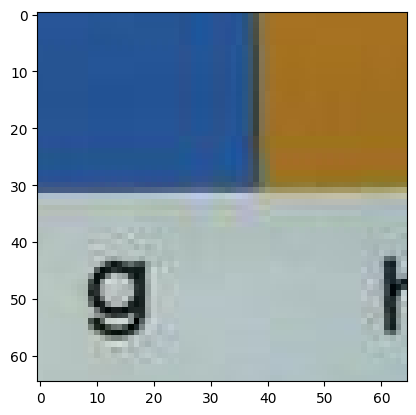

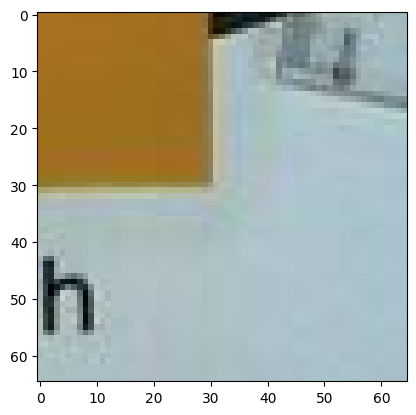

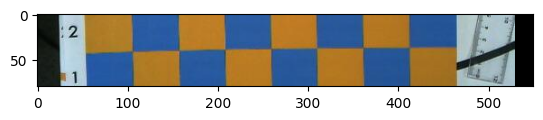

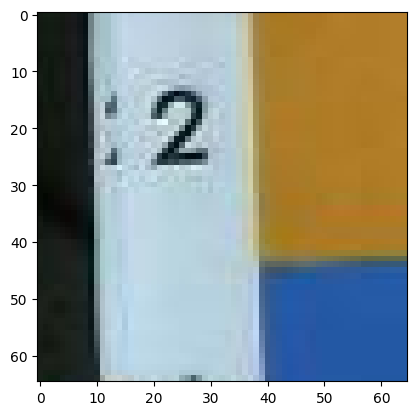

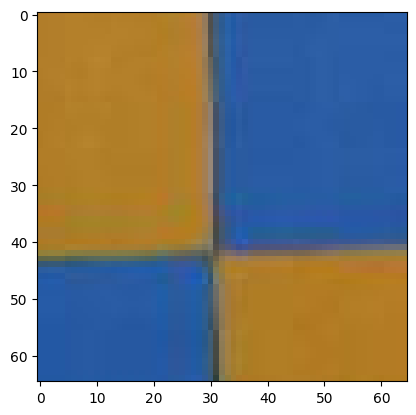

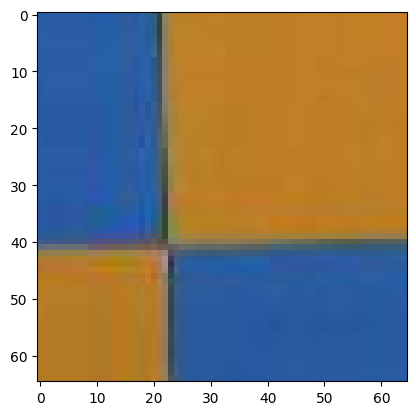

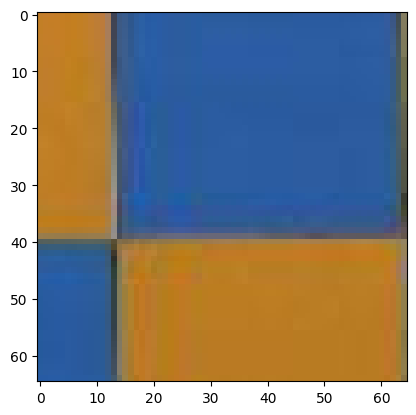

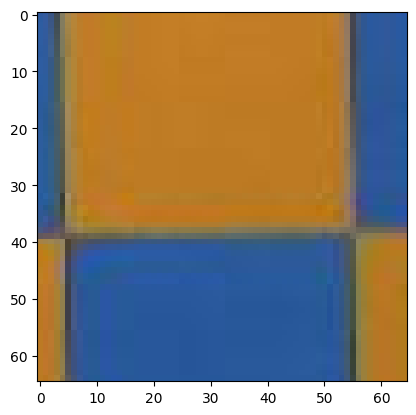

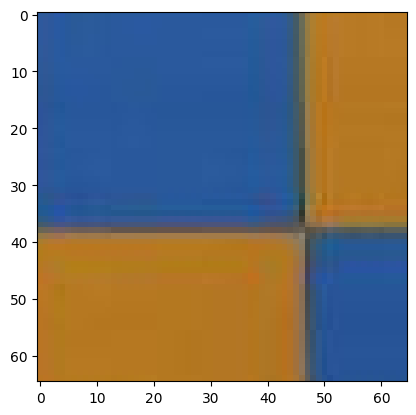

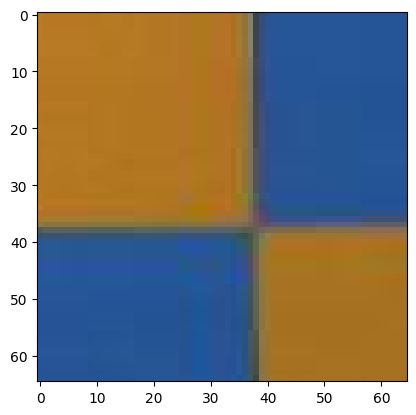

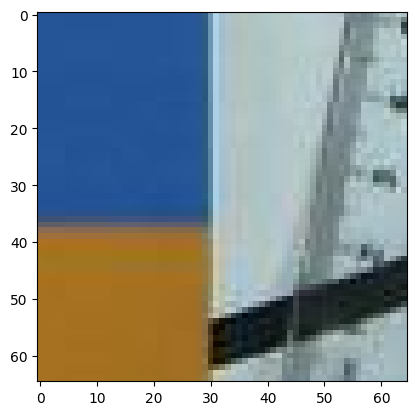

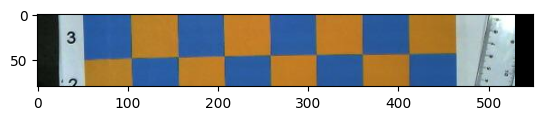

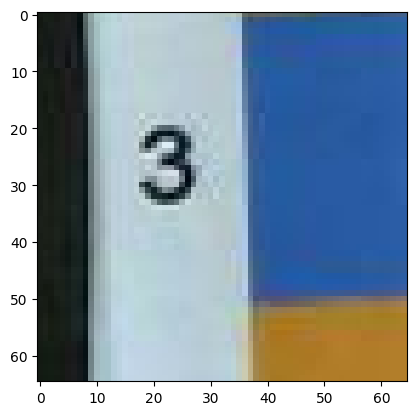

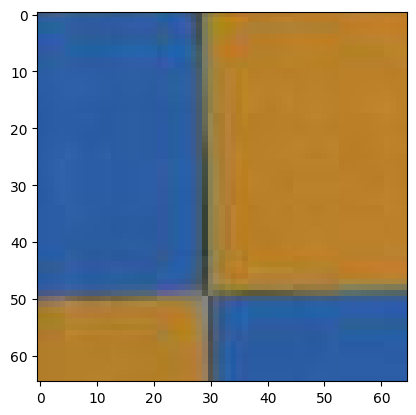

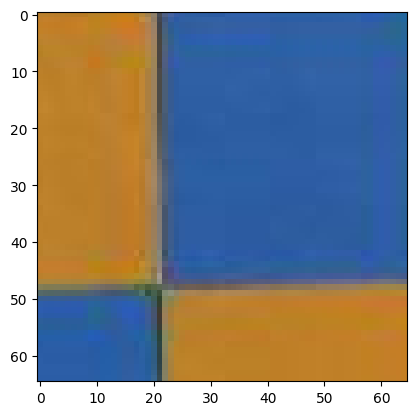

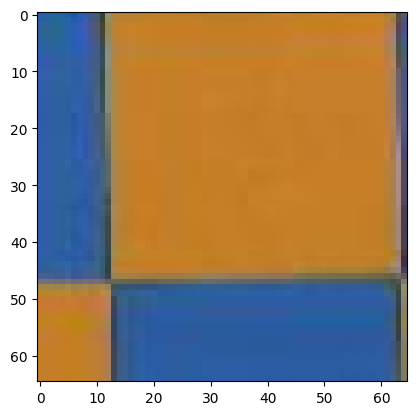

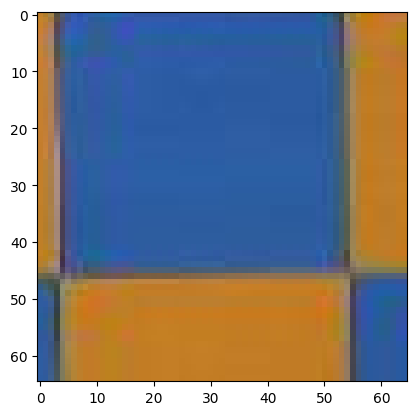

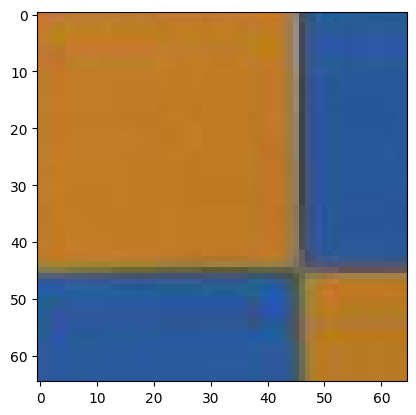

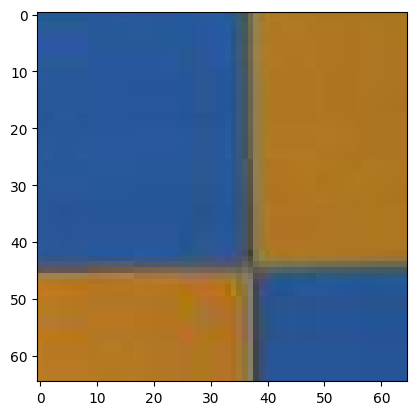

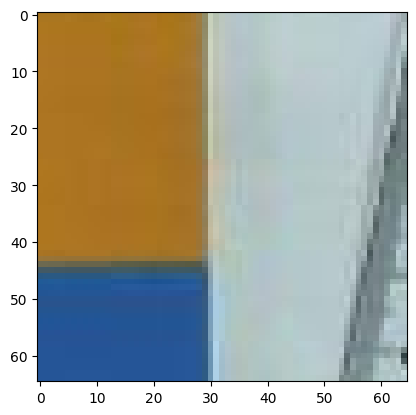

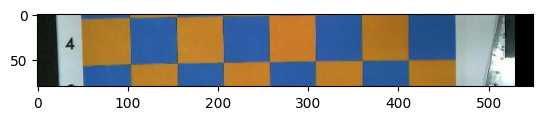

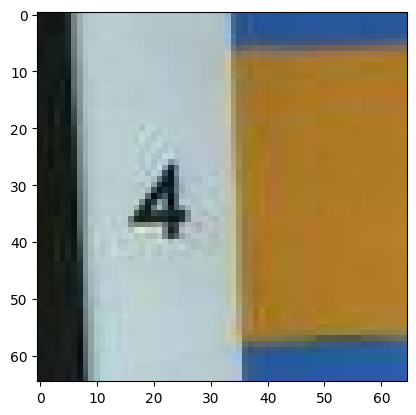

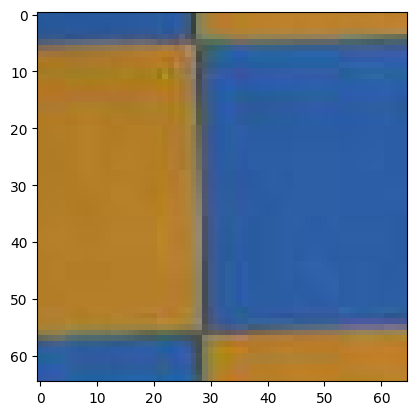

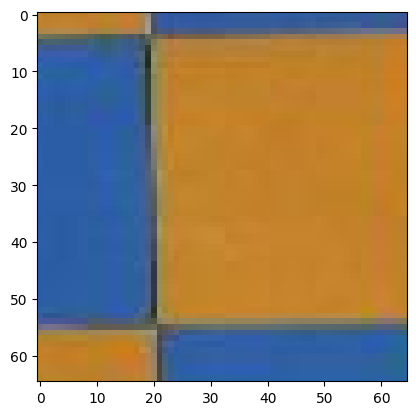

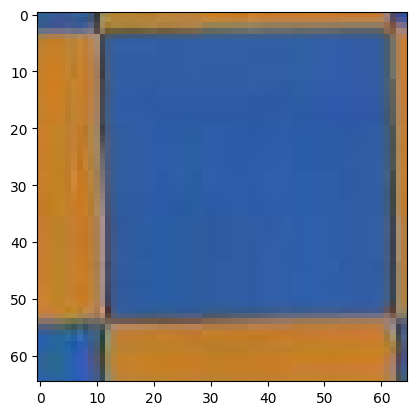

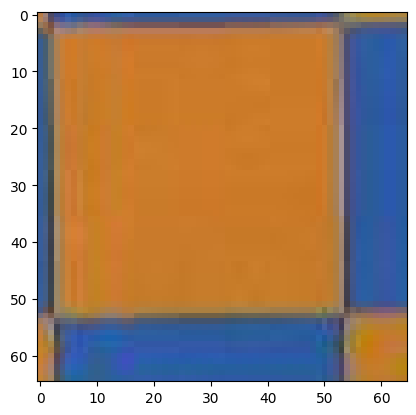

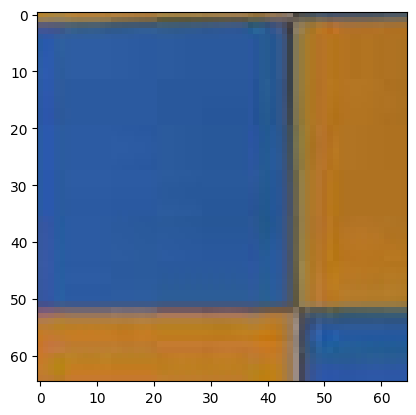

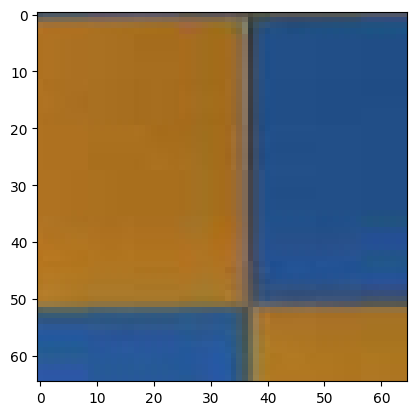

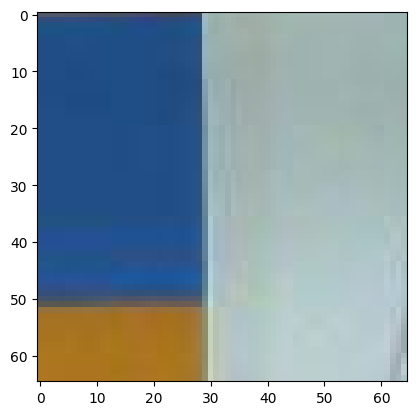

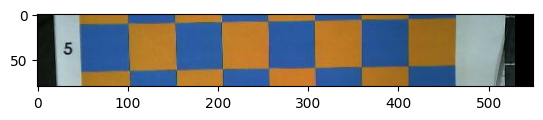

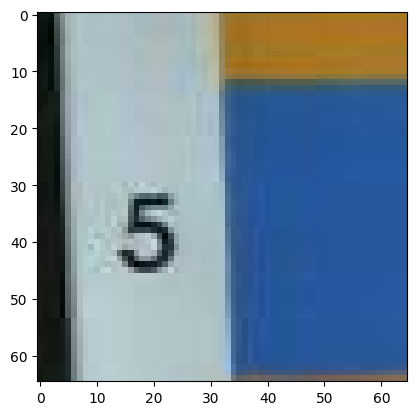

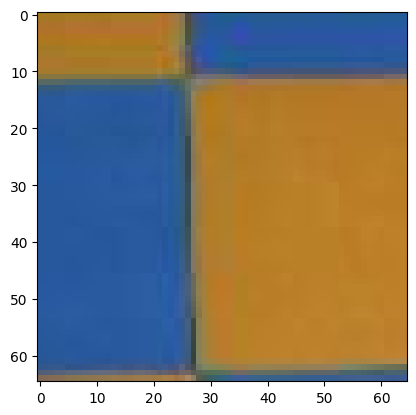

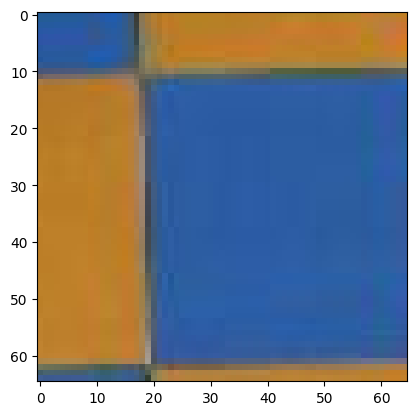

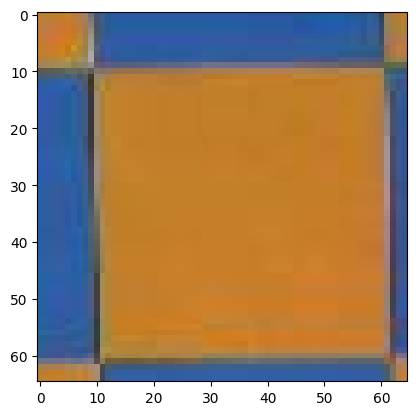

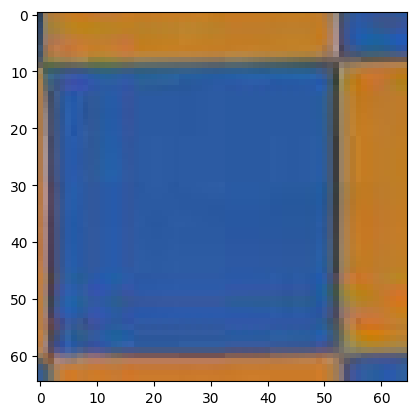

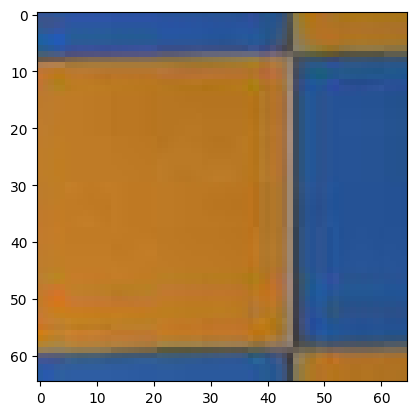

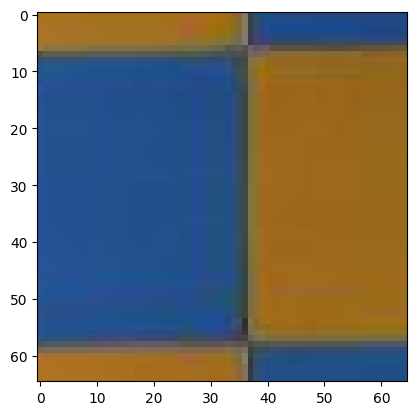

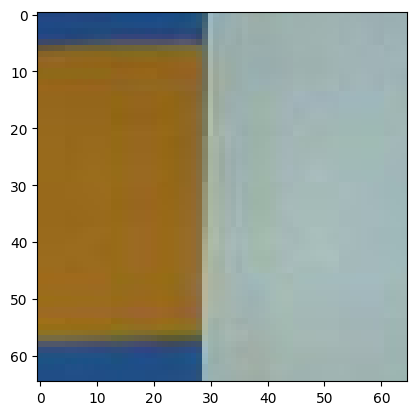

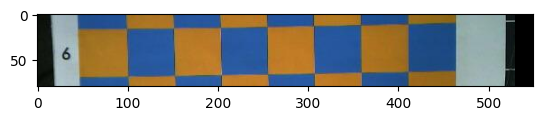

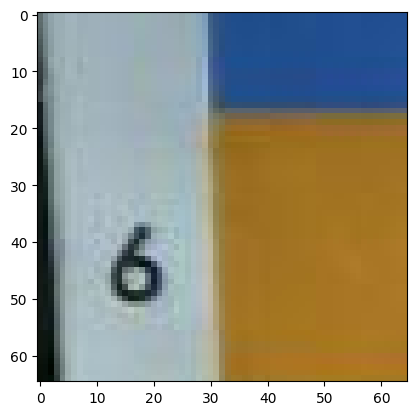

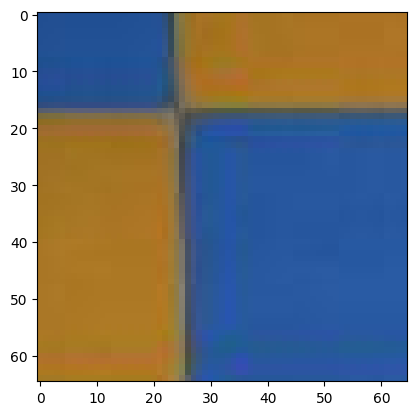

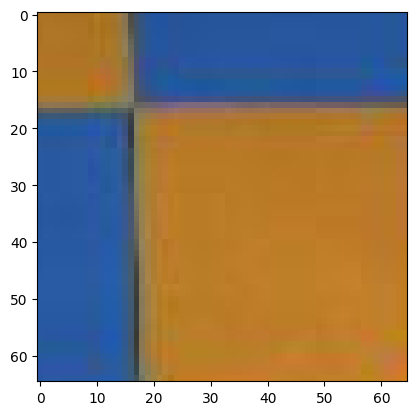

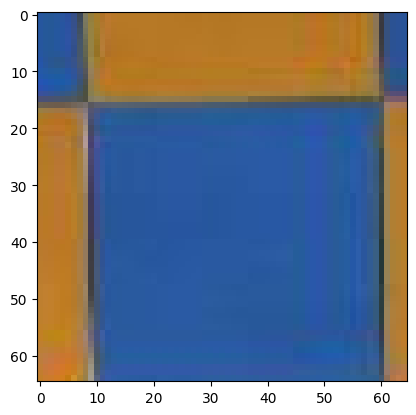

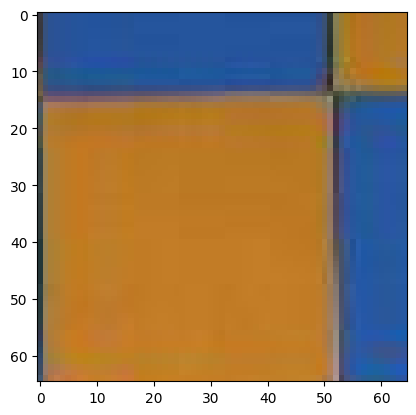

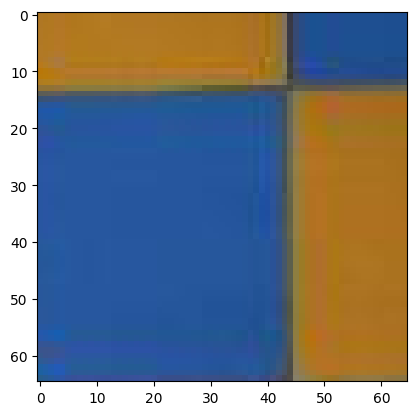

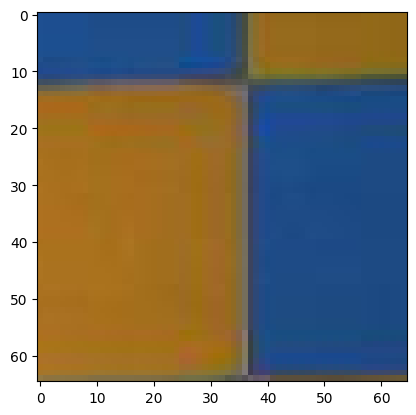

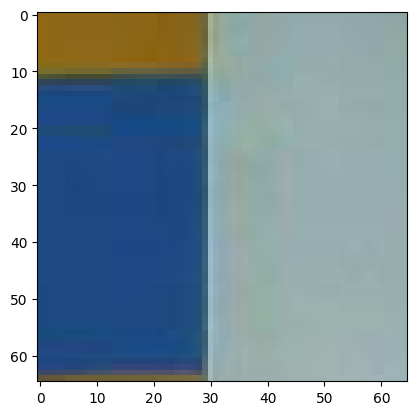

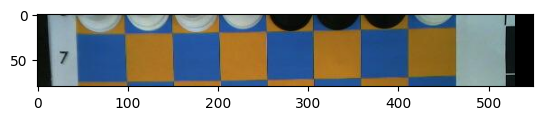

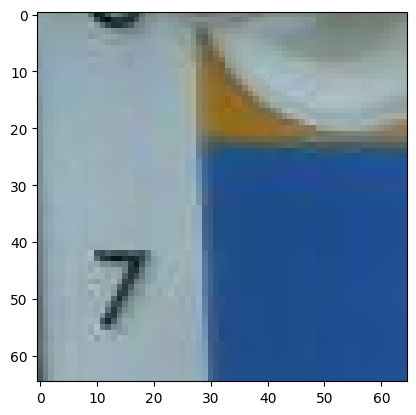

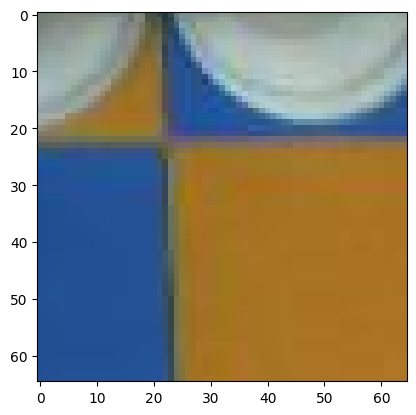

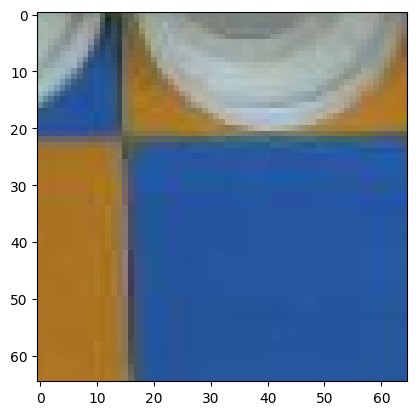

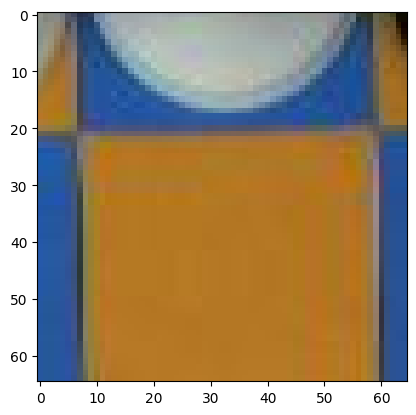

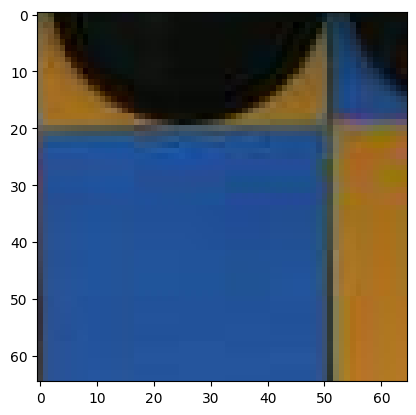

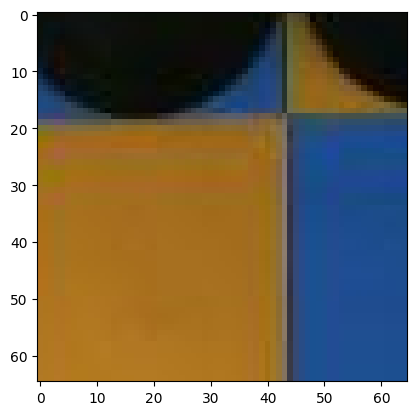

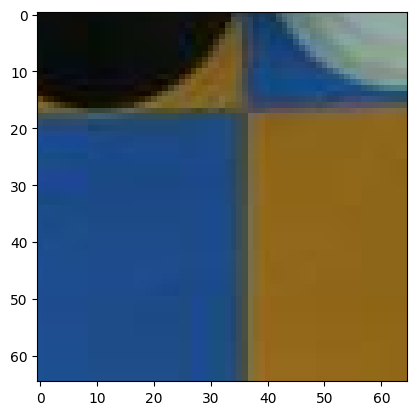

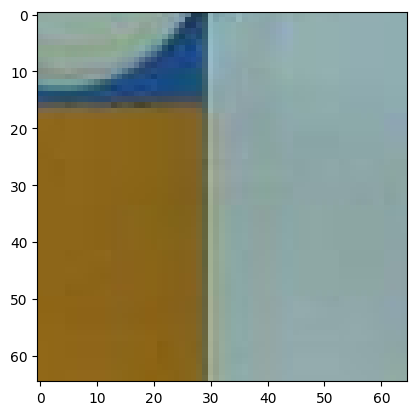

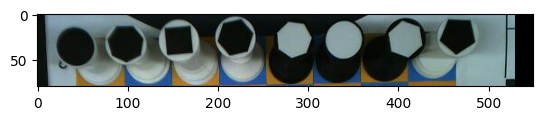

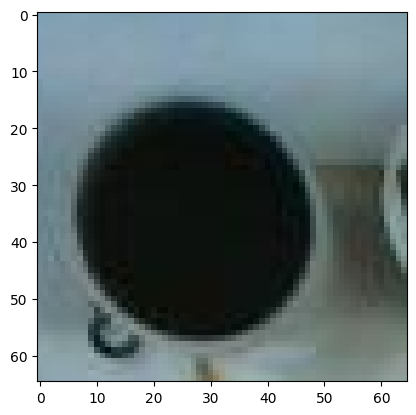

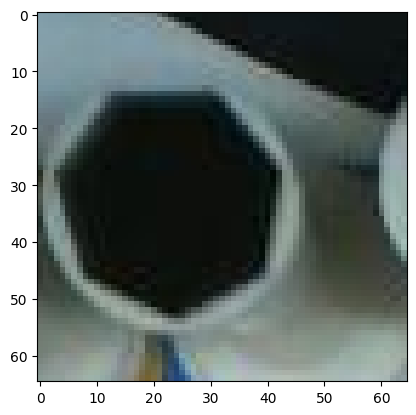

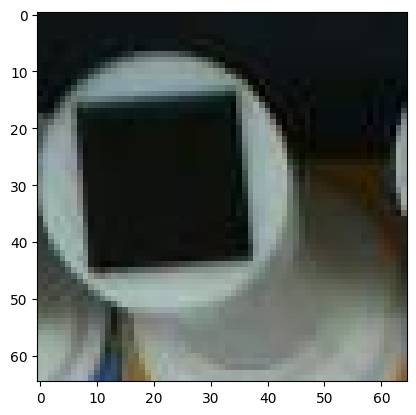

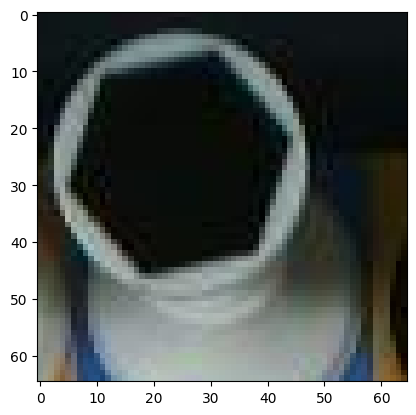

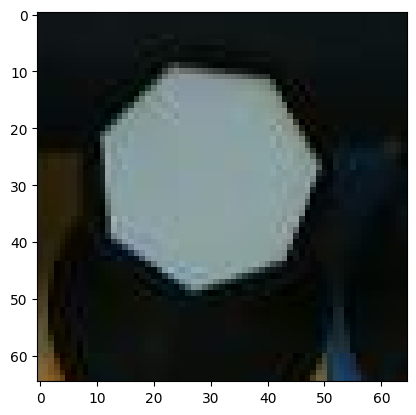

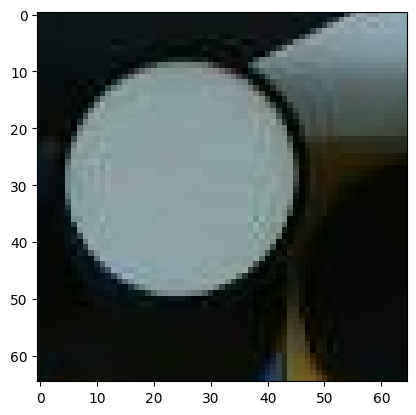

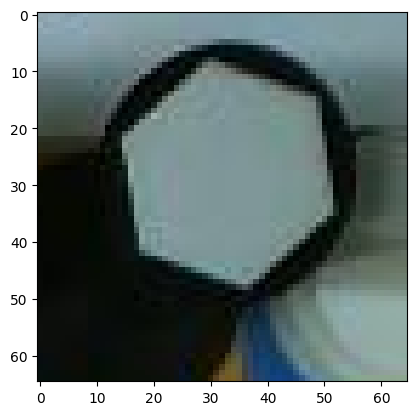

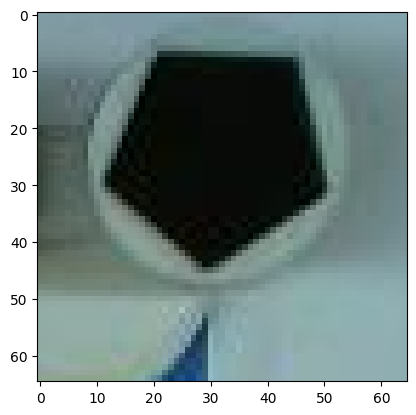

In [261]:
aRank = Image.open(fp="images/8.jpg")
divideBoardToSquares(aRank)

In [42]:
def recognizeImage(path):
  image = cv2.imread(path)

  # create instance of text detector
  reader = easyocr.Reader(["en"], gpu=False) # only nvidia and apple gpus supported

  # detect text on image
  text = reader.readtext(image)

  for i in text:
    print(i)

recognizeImage("chessboard.jpg")

Using CPU. Note: This module is much faster with a GPU.


([[np.int32(216), np.int32(210)], [np.int32(468), np.int32(210)], [np.int32(468), np.int32(356)], [np.int32(216), np.int32(356)]], 'V O', np.float64(0.5199190039873347))


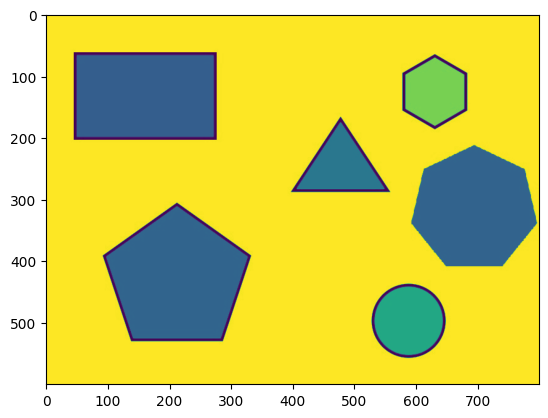

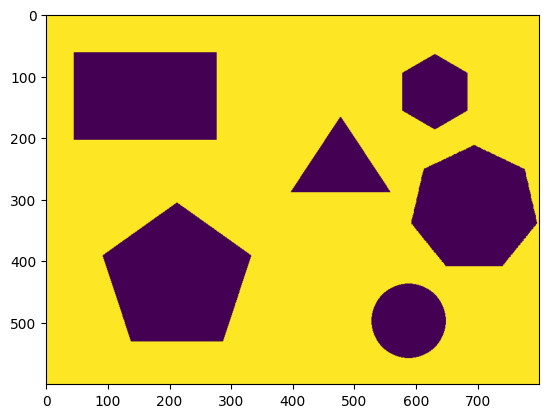

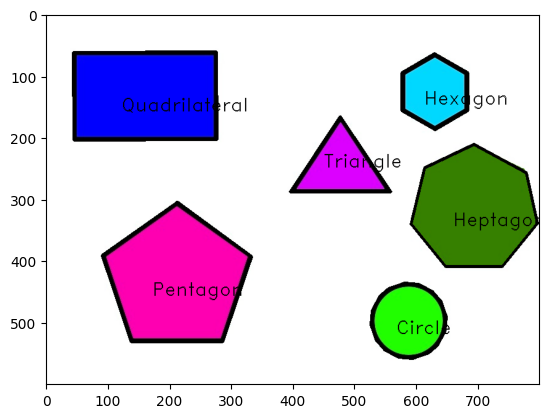

In [6]:
image = cv2.imread("images/shape.jpg")

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # Converting to gray image


plt.imshow(gray_image)
plt.show()

# Setting threshold value to get new image (In simpler terms: this function checks every pixel, and depending on how
# dark the pixel is, the threshold value will convert the pixel to either black or white (0 or 1)).
_, thresh_image = cv2.threshold(gray_image, 220, 255, cv2.THRESH_BINARY)

plt.imshow(thresh_image)
plt.show()

# Retrieving outer-edge coordinates in the new threshold image
contours, hierarchy = cv2.findContours(thresh_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Iterating through each contour to retrieve coordinates of each shape
for i, contour in enumerate(contours):
    if i == 0:
        continue

    # The 2 lines below this comment will approximate the shape we want. The reason being that in certain cases the
    # shape we want might have flaws or might be imperfect, and so, for example, if we have a rectangle with a
    # small piece missing, the program will still count it as a rectangle. The epsilon value will specify the
    # precision in which we approximate our shape.
    epsilon = 0.01*cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)

    # Drawing the outer-edges onto the image
    cv2.drawContours(image, contour, 0, (0, 0, 0), 4)

    # Retrieving coordinates of the contour so that we can put text over the shape.
    x, y, w, h= cv2.boundingRect(approx)
    x_mid = int(x + (w/3)) # This is an estimation of where the middle of the shape is in terms of the x-axis.
    y_mid = int(y + (h/1.5)) # This is an estimation of where the middle of the shape is in terms of the y-axis.

    # Setting some variables which will be used to display text on the final image
    coords = (x_mid, y_mid)
    colour = (0, 0, 0)
    font = cv2.FONT_HERSHEY_DUPLEX

    # This is the part where we actually guess which shape we have detected. The program will look at the amount of edges
    # the contour/shape has, and then based on that result the program will guess the shape (for example, if it has 3 edges
    # then the chances that the shape is a triangle are very good.)
    #
    # You can add more shapes if you want by checking more lenghts, but for the simplicity of this tutorial program I
    # have decided to only detect 5 shapes.
    
    # 6 shapes for 6 type of pieces
    if len(approx) == 3:
        shape = "Triangle"
    elif len(approx) == 4:
        shape = "Quadrilateral"
    elif len(approx) == 5:
        shape = "Pentagon"
    elif len(approx) == 6:
        shape = "Hexagon"
    elif len(approx) == 7:
        shape = "Heptagon"
    elif len(approx) > 7:
        shape = "Circle"
    else:
      shape = "Unknown"
    
    cv2.drawContours(image, [approx], -1, (0, 0, 0), 3)
    cv2.putText(image, shape, coords, font, 1, colour, 1)



plt.imshow(image)
plt.show()

In [38]:
def shapeRecognition(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # Converting to gray image

    # plt.imshow(gray_image)
    # plt.show()

    # Setting threshold value to get new image (In simpler terms: this function checks every pixel, and depending on how
    # dark the pixel is, the threshold value will convert the pixel to either black or white (0 or 1)).
    _, thresh_image = cv2.threshold(gray_image, 200, 255, cv2.THRESH_BINARY)

    plt.imshow(thresh_image)
    plt.show()

    # Retrieving outer-edge coordinates in the new threshold image
    contours, hierarchy = cv2.findContours(thresh_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Iterating through each contour to retrieve coordinates of each shape
    for i, contour in enumerate(contours):
        if i == 0:
            continue

        # The 2 lines below this comment will approximate the shape we want. The reason being that in certain cases the
        # shape we want might have flaws or might be imperfect, and so, for example, if we have a rectangle with a
        # small piece missing, the program will still count it as a rectangle. The epsilon value will specify the
        # precision in which we approximate our shape.
        epsilon = 0.01*cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)

        # Drawing the outer-edges onto the image
        cv2.drawContours(image, contour, 0, (0, 0, 0), 4)

        # Retrieving coordinates of the contour so that we can put text over the shape.
        x, y, w, h= cv2.boundingRect(approx)
        x_mid = int(x + (w/3)) # This is an estimation of where the middle of the shape is in terms of the x-axis.
        y_mid = int(y + (h/1.5)) # This is an estimation of where the middle of the shape is in terms of the y-axis.

        # Setting some variables which will be used to display text on the final image
        coords = (x_mid, y_mid)
        colour = (255,192,203)
        font = cv2.FONT_HERSHEY_DUPLEX

        # This is the part where we actually guess which shape we have detected. The program will look at the amount of edges
        # the contour/shape has, and then based on that result the program will guess the shape (for example, if it has 3 edges
        # then the chances that the shape is a triangle are very good.)
        #
        # You can add more shapes if you want by checking more lenghts, but for the simplicity of this tutorial program I
        # have decided to only detect 5 shapes.
        # 6 shapes for 6 type of pieces
        if len(approx) == 3:
            shape = "Triangle"
        elif len(approx) == 4:
            shape = "Quadrilateral"
        elif len(approx) == 5:
            shape = "Pentagon"
        elif len(approx) == 6:
            shape = "Hexagon"
        elif len(approx) == 7:
            shape = "Heptagon"
        elif len(approx) > 7:
            shape = "Circle"
        else:
            shape = "Unknown"
        
        cv2.drawContours(image, [approx], -1, (0, 0, 0), 3)
        cv2.putText(image, shape, coords, font, .5, colour, 1)



    plt.imshow(image)
    plt.show()

In [41]:
def whiteShapeRecognition(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # Converting to gray image

    # plt.imshow(gray_image)
    # plt.show()

    # Setting threshold value to get new image (In simpler terms: this function checks every pixel, and depending on how
    # dark the pixel is, the threshold value will convert the pixel to either black or white (0 or 1)).
    _, thresh_image =  cv2.threshold(image, 200, 255, cv2.THRESH_BINARY) # for white objects

    plt.imshow(thresh_image)
    plt.show()

    # Retrieving outer-edge coordinates in the new threshold image
    contours, hierarchy = cv2.findContours(thresh_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Iterating through each contour to retrieve coordinates of each shape
    for i, contour in enumerate(contours):
        if i == 0:
            continue

        # The 2 lines below this comment will approximate the shape we want. The reason being that in certain cases the
        # shape we want might have flaws or might be imperfect, and so, for example, if we have a rectangle with a
        # small piece missing, the program will still count it as a rectangle. The epsilon value will specify the
        # precision in which we approximate our shape.
        epsilon = 0.01*cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)

        # Drawing the outer-edges onto the image
        cv2.drawContours(image, contour, 0, (0, 0, 0), 4)

        # Retrieving coordinates of the contour so that we can put text over the shape.
        x, y, w, h= cv2.boundingRect(approx)
        x_mid = int(x + (w/3)) # This is an estimation of where the middle of the shape is in terms of the x-axis.
        y_mid = int(y + (h/1.5)) # This is an estimation of where the middle of the shape is in terms of the y-axis.

        # Setting some variables which will be used to display text on the final image
        coords = (x_mid, y_mid)
        colour = (255,192,203)
        font = cv2.FONT_HERSHEY_DUPLEX

        # This is the part where we actually guess which shape we have detected. The program will look at the amount of edges
        # the contour/shape has, and then based on that result the program will guess the shape (for example, if it has 3 edges
        # then the chances that the shape is a triangle are very good.)
        #
        # You can add more shapes if you want by checking more lenghts, but for the simplicity of this tutorial program I
        # have decided to only detect 5 shapes.
        # 6 shapes for 6 type of pieces
        if len(approx) == 3:
            shape = "Triangle"
        elif len(approx) == 4:
            shape = "Quadrilateral"
        elif len(approx) == 5:
            shape = "Pentagon"
        elif len(approx) == 6:
            shape = "Hexagon"
        elif len(approx) == 7:
            shape = "Heptagon"
        elif len(approx) > 7:
            shape = "Circle"
        else:
            shape = "Unknown"
        
        cv2.drawContours(image, [approx], -1, (0, 0, 0), 3)
        cv2.putText(image, shape, coords, font, .5, colour, 1)



    plt.imshow(image)
    plt.show()

In [45]:
def blackShapeRecognition(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # Converting to gray image

    # plt.imshow(gray_image)
    # plt.show()

    # Setting threshold value to get new image (In simpler terms: this function checks every pixel, and depending on how
    # dark the pixel is, the threshold value will convert the pixel to either black or white (0 or 1)).
    _,  thresh_image = cv2.threshold(image, 50, 255, cv2.THRESH_BINARY_INV)

    plt.imshow(thresh_image)
    plt.show()

    # Retrieving outer-edge coordinates in the new threshold image
    contours, hierarchy = cv2.findContours(thresh_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Iterating through each contour to retrieve coordinates of each shape
    for i, contour in enumerate(contours):
        if i == 0:
            continue

        # The 2 lines below this comment will approximate the shape we want. The reason being that in certain cases the
        # shape we want might have flaws or might be imperfect, and so, for example, if we have a rectangle with a
        # small piece missing, the program will still count it as a rectangle. The epsilon value will specify the
        # precision in which we approximate our shape.
        epsilon = 0.01*cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)

        # Drawing the outer-edges onto the image
        cv2.drawContours(image, contour, 0, (0, 0, 0), 4)

        # Retrieving coordinates of the contour so that we can put text over the shape.
        x, y, w, h= cv2.boundingRect(approx)
        x_mid = int(x + (w/3)) # This is an estimation of where the middle of the shape is in terms of the x-axis.
        y_mid = int(y + (h/1.5)) # This is an estimation of where the middle of the shape is in terms of the y-axis.

        # Setting some variables which will be used to display text on the final image
        coords = (x_mid, y_mid)
        colour = (255,192,203)
        font = cv2.FONT_HERSHEY_DUPLEX

        # This is the part where we actually guess which shape we have detected. The program will look at the amount of edges
        # the contour/shape has, and then based on that result the program will guess the shape (for example, if it has 3 edges
        # then the chances that the shape is a triangle are very good.)
        #
        # You can add more shapes if you want by checking more lenghts, but for the simplicity of this tutorial program I
        # have decided to only detect 5 shapes.
        # 6 shapes for 6 type of pieces
        if len(approx) == 3:
            shape = "Triangle"
        elif len(approx) == 4:
            shape = "Quadrilateral"
        elif len(approx) == 5:
            shape = "Pentagon"
        elif len(approx) == 6:
            shape = "Hexagon"
        elif len(approx) == 7:
            shape = "Heptagon"
        elif len(approx) > 7:
            shape = "Circle"
        else:
            shape = "Unknown"
        
        cv2.drawContours(image, [approx], -1, (0, 0, 0), 3)
        cv2.putText(image, shape, coords, font, .5, colour, 1)



    plt.imshow(image)
    plt.show()

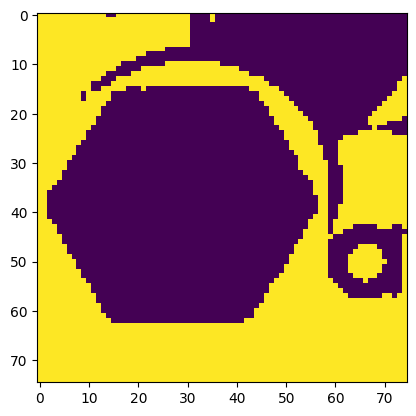

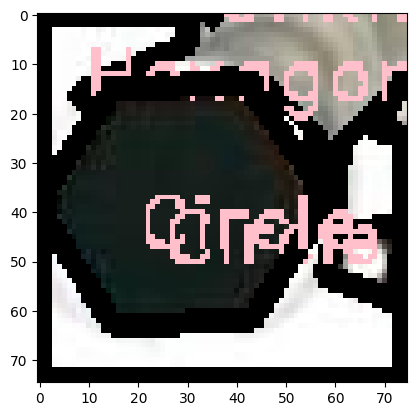

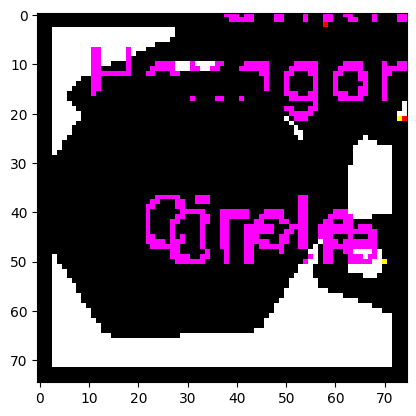

error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\contours_new.cpp:330: error: (-2:Unspecified error) in function 'class std::shared_ptr<struct ContourScanner_> __cdecl ContourScanner_::create(class cv::Mat,int,int,class cv::Point_<int>)'
> Modes other than RETR_FLOODFILL and RETR_CCOMP support only CV_8UC1 images (expected: 'img.type() == CV_8UC1'), where
>     'img.type()' is 16 (CV_8UC3)
> must be equal to
>     'CV_8UC1' is 0 (CV_8UC1)


In [47]:

image = cv2.imread("images/squares/a1.jpg")  
shapeRecognition(image)
whiteShapeRecognition(image)
blackShapeRecognition(image)

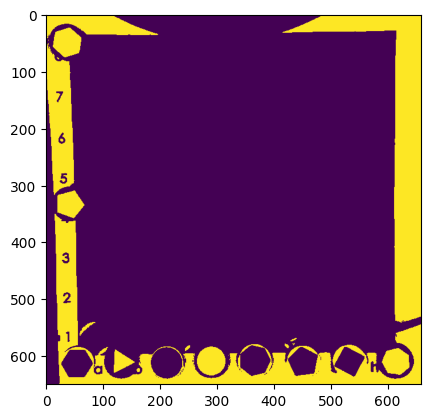

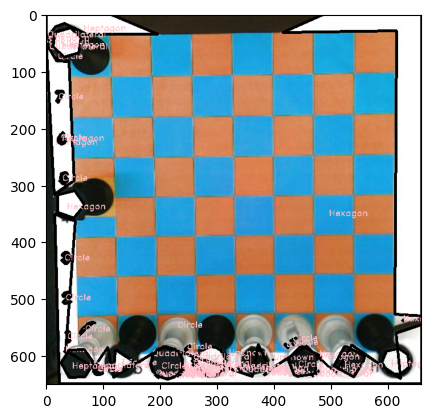

In [43]:
image = cv2.imread("images/chessboard.jpg")  
shapeRecognition(image)

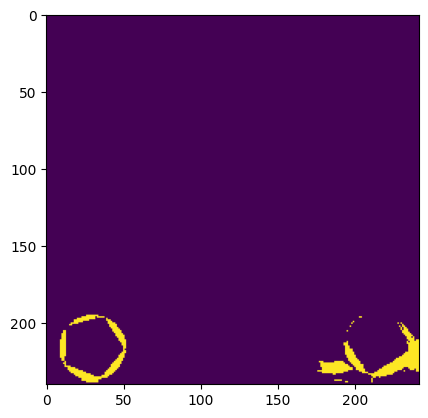

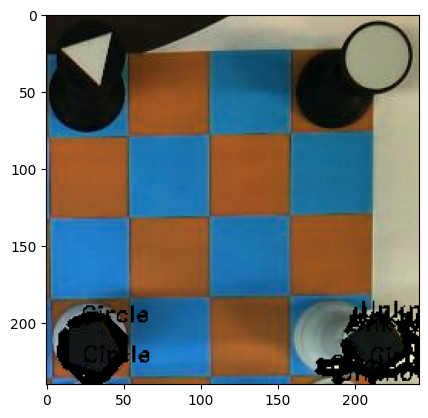

In [ ]:
image = cv2.imread("images/q1.jpg")
shapeRecognition(image)

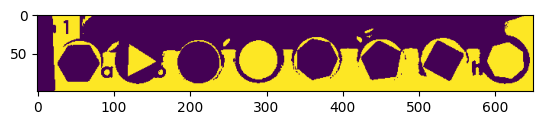

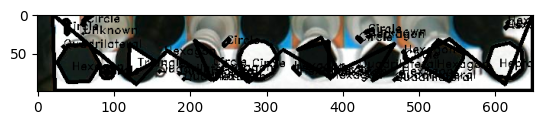

In [161]:
image = cv2.imread("images/a1.jpg")
shapeRecognition(image)